HOUSE PREDICTIONS

In [1]:
from statistics import correlation

#Regression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math



IMPORTING DEPENDENCIES

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
# Load the Boston Housing dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
# Convert to DataFrame
bostondf = boston.frame
# View the first few rows
print(bostondf.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [16]:
print(bostondf)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [17]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [24]:
bostondf['price'] =boston.target
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


In [26]:
bostondf.shape

(506, 15)

CHECK MISSING VALUES


In [28]:
bostondf.isnull()
bostondf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
price      0
dtype: int64

STATISTICAL METHOD OF DATAFRAME

In [29]:
boston_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


CORRELATION BETWEEN THE DATA
if one value increases other also increases and vice-versa
1. Positive correlation :Dark colour
2. Negative correlation :Light colour

<Axes: >

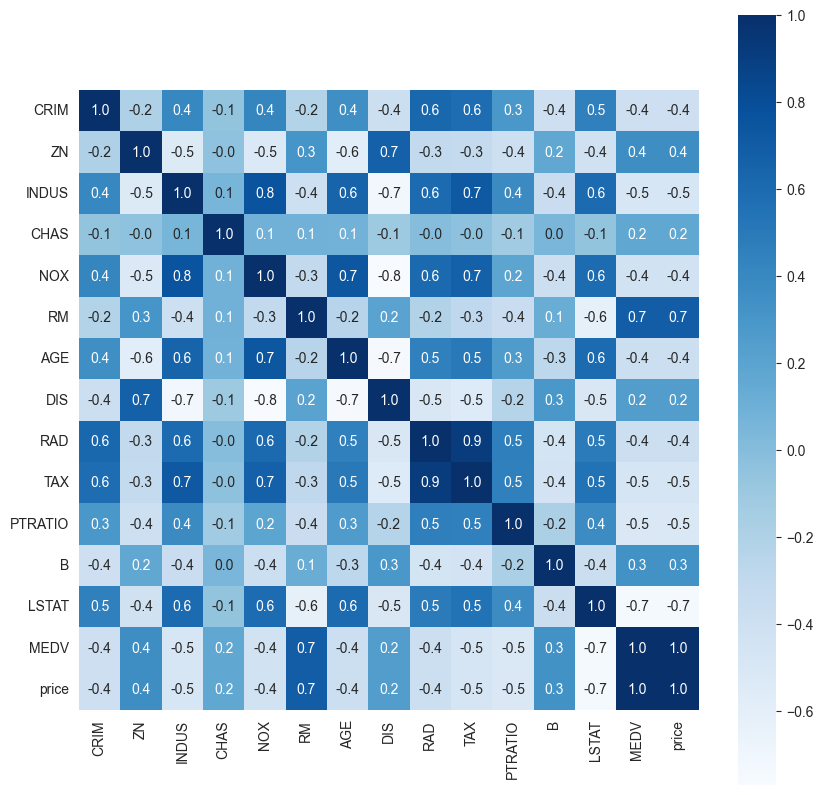

In [40]:
correlation = bostondf.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')

Splitting the Data and the target

In [42]:
X =bostondf.drop('price',axis=1)
Y =bostondf['price']
print(X)
print(Y)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [69]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X.shape ,X_train.shape ,X_test.shape)

(506, 14) (404, 14) (102, 14)


XGBOOST REGRESSOR

In [70]:
model = XGBRegressor(enable_categorical=True)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [73]:
test_predictions = model.predict(X_test)
print(test_predictions)

[23.624437  33.156326  13.497888  22.752777  16.054495  20.049717
 17.733757  13.855239  19.628855  16.725445  21.55717   18.868145
  6.421283  21.205372  18.543804  29.630348  18.933035  10.287792
 49.960995  14.056194  24.932232  29.375593  12.959052  22.457947
 14.208376  13.950902  20.333443  14.924933  21.663313  18.30457
 23.107372  23.80591   15.120312  20.718716  19.112986  19.29816
 34.932682  19.388718  24.372667  23.359158  19.75291   28.271757
 49.96189   17.066826  22.619982  15.018448  13.13969   24.086107
 19.968605  23.997362  18.852404  35.10337   14.991141  26.480886
 43.695232  21.20443   18.373032  28.219633  23.93816   18.481806
 25.022491  34.42988   31.195503  20.178385  24.077076  19.998854
 12.913813  24.771996  30.931393  12.860348  19.997639  23.677975
 10.566268  20.579271  20.72195    5.048574  20.123684  48.28632
 10.475076   6.3147025 20.717735  17.18597   20.7024     9.264915
 19.387054  29.53965   16.237562  24.978392  24.975786  17.10382
 23.18634   10

R SQUARE AND MSE

In [78]:
# Predict on training data
training_pred = model.predict(X_train)
r2 = metrics.r2_score(Y_train, training_pred)
print("R2 score on training data:", r2)
mae = metrics.mean_absolute_error(Y_train, training_pred)
print("MAE on training data:", mae)


R2 score on training data: 0.9999999758062157
MAE on training data: 0.0010130832691003992


In [80]:
#prediction on test data
test_predictions = model.predict(X_test)
r2score =metrics.r2_score(Y_test ,test_predictions)
print(r2score)
mse1 =metrics.mean_squared_error(Y_test,test_predictions)
print(mse1)

0.9993883032216899
0.04485803890045549


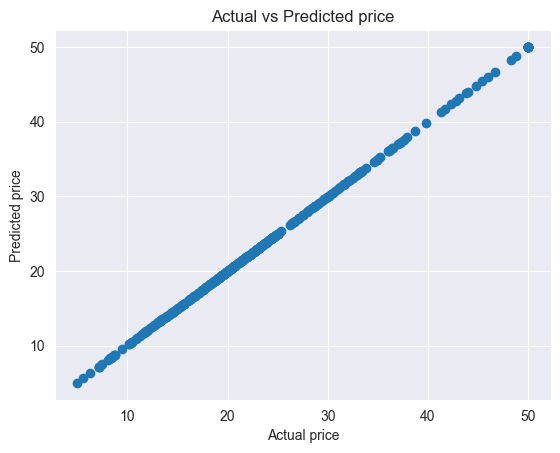

In [82]:
plt.scatter(Y_train,training_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted price')
plt.show()

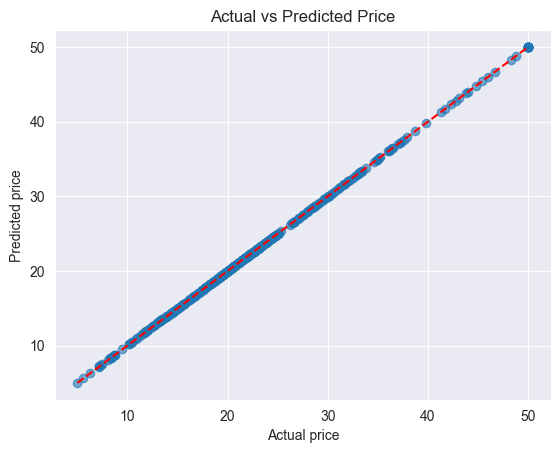

In [84]:
plt.scatter(Y_train, training_pred, alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')  # diagonal line
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted Price')
plt.show()